In [ ]:
import numpy as np
import skfuzzy as fuzz
import matpotlib.pyplot as plt

In [ ]:
pip install Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matpotlib.pyplot as plt

ModuleNotFoundError: ignored

In [3]:
%pip install scipy
%pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=52e2058a58ad38feb1115f42354910cc58c7c7aad481888005b0a0fe64b9ce6c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matpotlib.pyplot as plt
x=np.average(30,8111)
slow=fuzz.trimf(x,[30,40,50])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')

ModuleNotFoundError: ignored

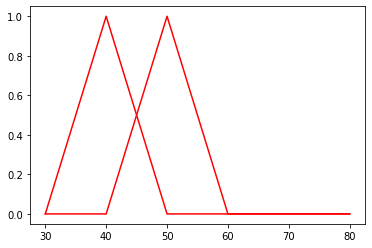

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,40,50])
medium = fuzz.trimf(x,[40,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='slow')

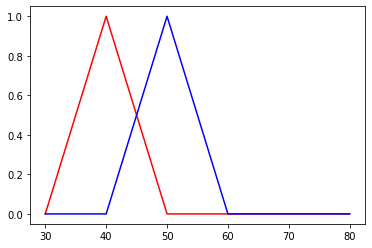

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,40,40,50])
medium = fuzz.trapmf(x,[40,50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='slow')

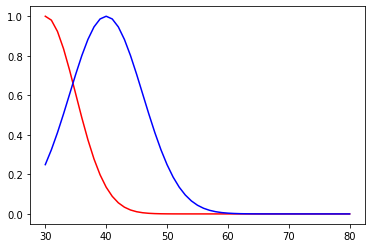

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.gaussmf(x,30,5)
medium = fuzz.gaussmf(x,40,6)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='slow')

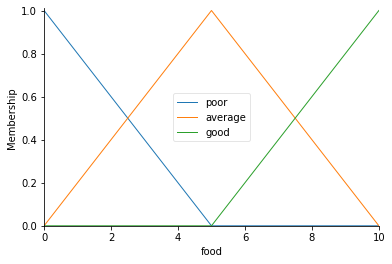

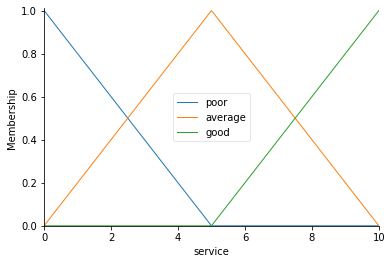

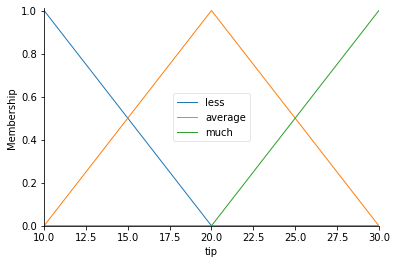

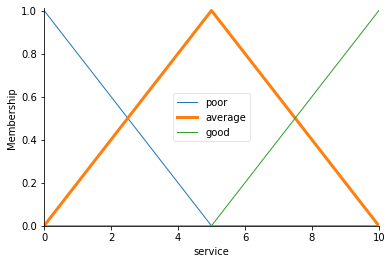

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

service['average'].view() #nhấn mạnh average




26.666666666666657


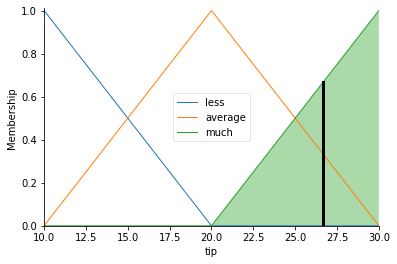

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

28.785932721712527


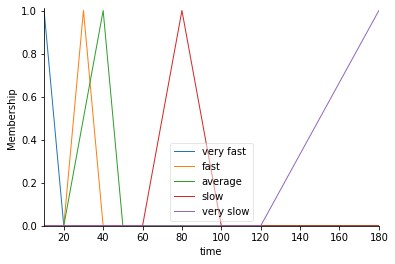

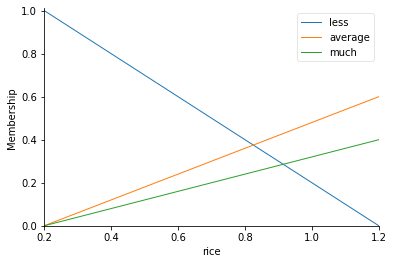

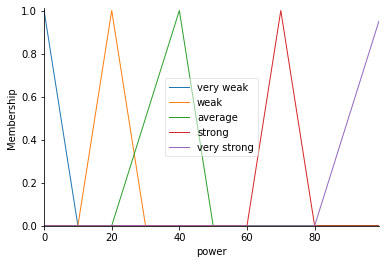

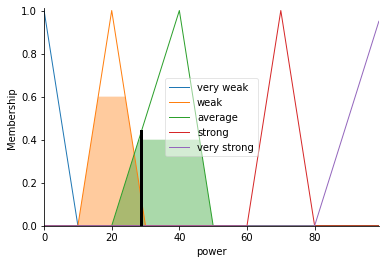

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(0.2,1.5,1),'rice')
power = ctrl.Consequent(np.arange(0,100,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[20,30,40])
time['average'] = fuzz.trimf(time.universe,[20,40,50])
time['slow'] = fuzz.trimf(time.universe,[60,80,100])
time['very slow'] = fuzz.trimf(time.universe,[120,180,180])


rice['less'] = fuzz.trimf(rice.universe,[0.2,0.2,1])
rice['average'] = fuzz.trimf(rice.universe,[0.2,1,1.5])
rice['much'] = fuzz.trimf(rice.universe,[1,1.5,1.5])

power['very weak'] = fuzz.trimf(power.universe,[0,0,10])
power['weak'] = fuzz.trimf(power.universe,[10,20,30])
power['average'] = fuzz.trimf(power.universe,[20,40,50])
power['strong'] = fuzz.trimf(power.universe,[60,70,80])
power['very strong'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

from skfuzzy.control.controlsystem import ControlSystemSimulation
rule1 = ctrl.Rule(time['very fast']&rice['less'],power['very weak'])
rule2 = ctrl.Rule(time['very fast']&rice['average'],power['weak'])
rule3 = ctrl.Rule(time['very fast']&rice['much'],power['average'])
rule4 = ctrl.Rule(time['fast']&rice['less'],power['strong'])
rule5 = ctrl.Rule(time['fast']&rice['average'],power['very strong'])
rule6 = ctrl.Rule(time['fast']&rice['much'],power['very weak'])
rule7 = ctrl.Rule(time['average']&rice['less'],power['weak'])
rule8 = ctrl.Rule(time['average']&rice['average'],power['average'])
rule9 = ctrl.Rule(time['average']&rice['much'],power['strong'])
rule10 = ctrl.Rule(time['slow']&rice['less'],power['very strong'])
rule11 = ctrl.Rule(time['slow']&rice['average'],power['very weak'])
rule12 = ctrl.Rule(time['slow']&rice['much'],power['weak'])
rule13 = ctrl.Rule(time['very slow']&rice['less'],power['average'])
rule14 = ctrl.Rule(time['very slow']&rice['average'],power['strong'])
rule15 = ctrl.Rule(time['very slow']&rice['much'],power['very strong'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=10
tipping.input['rice']=10
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)